# Tiny instruction 
## Use **Pip Installs** - wait until execution is stopped 

## Use **Pip imports** and then **settings**

# PIP INSTALLS

In [ ]:
!pip install sentinelhub
!pip install eo-learn-core
!pip install eo-learn-visualization[FULL]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 218 kB 4.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 131 kB 4.3 MB/s 
     |████████████████████████████████| 3.2 MB 24.8 MB/s 
     |████████████████████████████████| 62 kB 279 kB/s 
     |████████████████████████████████| 6.3 MB 37.9 MB/s 
  Created wheel for sentinelhub: filename=sentinelhub-3.8.0-py3-none-any.whl size=242448 sha256=f9114f2184c25e001805423212e1a3c4d2a9ad105b101d7d1b101d3fa63f8922
  Stored in directory: /root/.cache/pip/wheels/ce/68/7c/b1f724eb2a244d530ead8d66caf99b762eea79701c72265702
  Created wheel for utm: filename=utm-0.7.0-py3-none-any.whl size=6108 sha256=bbe074adfe5752a78badd18552331ece64309897426c0497a49ba4f6394f6dc7
  Stored in directory: /root/.cache/pip/wheels/a5/b0/12/7ee4fdb0f9fbb4157100bd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 68 kB 3.2 MB/s 
     |████████████████████████████████| 135 kB 11.0 MB/s 
     |████████████████████████████████| 1.0 MB 36.3 MB/s 
     |████████████████████████████████| 132 kB 35.9 MB/s 
     |████████████████████████████████| 16.7 MB 784 kB/s 
     |████████████████████████████████| 9.8 MB 34.0 MB/s 
     |████████████████████████████████| 79 kB 8.1 MB/s 
     |████████████████████████████████| 140 kB 50.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/



Код ниже остановит работу. Это нормально. Запускайте ячейку после него

In [ ]:
from google.colab import output
import os


#output.eval_js('new Audio("https://proxy.notificationsounds.com/message-tones/relax-message-tone/download/file-sounds-1217-relax.mp3").play()')

os.kill(os.getpid(), 9)


# PIP IMPORTS

In [ ]:
%reload_ext autoreload
%autoreload

In [ ]:
!pip show sentinelhub
!pip install eo-learn-io
!pip install meteostat

Name: sentinelhub
Version: 3.8.0
Summary: Sentinel Hub Utilities
Home-page: https://github.com/sentinel-hub/sentinelhub-py
Author: Sinergise ltd.
Author-email: info@sentinel-hub.com
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: oauthlib, tqdm, requests-oauthlib, tifffile, typing-extensions, shared-memory38, shapely, numpy, dataclasses-json, pillow, requests, click, aenum, python-dateutil, pyproj, utm
Required-by: eo-learn-core
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 7.7 MB/s 
     |████████████████████████████████| 19.3 MB 5.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%matplotlib inline

from meteostat import Point, Daily, Monthly, Normals

import requests 

import datetime
import os

import multiprocessing

import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
import seaborn as sns

from eolearn.core import SaveTask, LoadTask, FeatureType, EOWorkflow,linearly_connect_tasks, EOExecutor,OverwritePermission, EOPatch

from eolearn.io import SentinelHubInputTask, SentinelHubDemTask, SentinelHubEvalscriptTask, get_available_timestamps

from sentinelhub import (
    CRS,
    BBox,
    WmsRequest,
    HistogramType,
    WcsRequest,
    FisRequest,
    Geometry,
    CustomUrlParam,
    DataCollection,
    DownloadRequest,
    MimeType,
    MosaickingOrder,
    SentinelHubDownloadClient,
    SentinelHubRequest,
    bbox_to_dimensions,
    SentinelHubStatistical,
)
from typing import Any, Optional, Tuple

from sentinelhub.time_utils import parse_time

# SETTINGS

In [ ]:
def make_config(ins_id):
  config = SHConfig()
  config.sh_client_id = 'NO'
  config.sh_client_secret = 'NO'
  config.instance_id = ins_id
  return (config)

In [ ]:
from sentinelhub import SHConfig

config = make_config("NO-SECRET-IS-HERE")

In [ ]:
config.save()

In [ ]:
coords_wgs84 = [11, 12, 13, 14]
resolution = 20
maxcc=0.6
coords_bbox = BBox(bbox=coords_wgs84, crs=CRS.WGS84)
coords_size = bbox_to_dimensions(coords_bbox, resolution=resolution)
time_intervals = ("1900-01-01", "2025-01-01")
start_data = datetime.datetime(1900, 1, 1)
end_data = datetime.datetime(2025, 1, 1)

print(f"Image shape at {resolution} m resolution: {coords_size} pixels")

Image shape at 20 m resolution: (24, 101) pixels


# Transfer NDVI to time stamps 

In [ ]:
coords_bbox = BBox(bbox=[51.66832032634,55.54965793272754, 51.710212984807804,55.656099834937024], crs=CRS.WGS84)
iter=2

In [ ]:
coords_bbox = BBox(bbox=[43.65897728623423,39.8019048723998, 43.68033496552715,39.82798231839563], crs=CRS.WGS84)
iter=3

In [ ]:
coords_bbox = BBox(bbox=[55.27270241512775,37.63253179147199, 55.28662415028995,37.65696914652468], crs=CRS.WGS84)
iter=4

In [ ]:
coords_bbox = BBox(bbox=[56.41102036778891,44.25694241484177, 56.42626362401187,44.29368045196794], crs=CRS.WGS84)
iter=5

In [ ]:
coords_bbox = BBox(bbox=[59.73277704263077,31.296347348048116, 59.74170637196017,31.33800565800369], crs=CRS.WGS84)
iter=6

## Sentinel 2l-L2A

In [ ]:
config=make_config("NO CODE")
config.save

DATACOLL = DataCollection.SENTINEL2_L2A

In [ ]:
current_path='/content/Sentinel_2l-L2A'
save_task = SaveTask(path=current_path, overwrite_permission=OverwritePermission.OVERWRITE_FEATURES)

### NDVI With clouds

In [ ]:
get_time_NDVI = """
    //VERSION=3

    function setup() {
        return {
            input: ["B04","B08","dataMask"],
            output:[{
                id: "indices",
                bands: 1,
                sampleType: SampleType.FLOAT32
            }]
        }
    }

    function evaluatePixel(sample) {
        let ndvi = index(sample.B08, sample.B04);
        return {
           indices: [ndvi]
        };
    }
"""

In [ ]:
play_Start_Sound()

In [ ]:
%%time

add_indices = SentinelHubEvalscriptTask(
    features=[(FeatureType.DATA, 'indices')],
    evalscript=get_time_NDVI,
    data_collection=DataCollection.SENTINEL2_L2A,
    resolution=resolution,
    maxcc=maxcc,
    time_difference=datetime.timedelta(hours=12),
    config=config,
    max_threads=MAXTHREADS,
)


workflow_nodes = linearly_connect_tasks(add_indices, save_task)
workflow = EOWorkflow(workflow_nodes)

execution_args = [{workflow_nodes[0]: {'bbox': coords_bbox, 'time_interval': time_intervals}}]
executor = EOExecutor(workflow, execution_args, save_logs=False) #Подрубайте save_logs если будут ошибки
executor.run(multiprocess=True)

executor.make_report()

  0%|          | 0/1 [00:00<?, ?it/s]

CPU times: user 6.23 s, sys: 498 ms, total: 6.73 s
Wall time: 1min 7s


In [ ]:
#Convert json to csv
path = current_path+"/timestamp.json"
df_with_clouds = pd.read_json(path)
df_with_clouds.to_csv(current_path+"/timestamp.csv")

In [ ]:
# В данном случае мы уже применяем формулу, вместо получения обычного значения

ndvi_script = "return [(B05 - B04) / (B05 + B04)]"

print(coords_bbox)
histogram_request = FisRequest(
    data_collection=DataCollection.SENTINEL2_L2A, # ТУТ МЕНЯЕМ СПУТНИКИ
    layer="TRUE_COLOR", # ПОСМОТРЕТЬ ДРУГИЕ СЛОИ
    geometry_list=[coords_bbox],
    time=time_intervals,
    time_difference=datetime.timedelta(hours=12),
    resolution="100m",
    bins=20,
    maxcc=maxcc,
    histogram_type=HistogramType.EQUIDISTANT,
    custom_url_params={CustomUrlParam.EVALSCRIPT: ndvi_script},
    config=config,
)

histogram_data = histogram_request.get_data()

59.73277704263077,31.296347348048116,59.74170637196017,31.33800565800369


In [ ]:
#Тут мы видим данные ndvi за определенные time stamp-ы
histogram_data

[{'C0': [{'date': '2022-11-01',
    'basicStats': {'min': 0.04059278219938278,
     'max': 0.060777515172958374,
     'mean': 0.047493674944195395,
     'stDev': 0.0030813153484962213},
    'histogram': {'bins': [{'lowEdge': 0.04059278219938278, 'count': 1.0},
      {'lowEdge': 0.04160201884806156, 'count': 6.0},
      {'lowEdge': 0.042611255496740344, 'count': 11.0},
      {'lowEdge': 0.04362049214541912, 'count': 26.0},
      {'lowEdge': 0.0446297287940979, 'count': 50.0},
      {'lowEdge': 0.04563896544277668, 'count': 66.0},
      {'lowEdge': 0.04664820209145546, 'count': 66.0},
      {'lowEdge': 0.04765743874013424, 'count': 46.0},
      {'lowEdge': 0.048666675388813016, 'count': 34.0},
      {'lowEdge': 0.0496759120374918, 'count': 24.0},
      {'lowEdge': 0.05068514868617058, 'count': 9.0},
      {'lowEdge': 0.05169438533484936, 'count': 7.0},
      {'lowEdge': 0.05270362198352814, 'count': 6.0},
      {'lowEdge': 0.053712858632206914, 'count': 2.0},
      {'lowEdge': 0.05472209

In [ ]:
plot_data = []
for idx, fis_response in enumerate(histogram_data):
    bins = fis_response["C0"][0]["histogram"]["bins"]

    counts = [value["count"] for value in bins]
    total_counts = sum(counts)
    counts = [round(100 * count / total_counts) for count in counts]

    bin_size = bins[1]["lowEdge"] - bins[0]["lowEdge"]
    splits = [value["lowEdge"] + bin_size / 2 for value in bins]

    print(fis_response["C0"][0]["basicStats"]["mean"])
    data = []
    for count, split in zip(counts, splits):
        data.extend([split] * count)
    plot_data.append(np.array(data))

0.047493674944195395


In [ ]:
# Тут, чтобы в лишний раз не биться, мы вставим наши значения ndvi (средние) в даты

ndvi = []
for i in range(len(fis_response["C0"])):
  print (fis_response["C0"][-i-1]["basicStats"]["mean"])
  ndvi.append(fis_response["C0"][-i-1]["basicStats"]["mean"])


0.03322831091835445
0.03762378154383243
0.03243387959209152
0.03615375370313612
0.040696251692007385
0.04192322414651838
0.037375496806698306
0.03406262380050739
0.03820691357933632
0.03786380782865151
0.03577623411547391
0.03604385638913219
0.039634008547696074
0.03414190448719361
0.03633655737781816
0.04089619473392223
0.03857478598618635
0.035233684542143505
0.03468052181921414
0.038188352543131826
0.03697626350407043
0.04042012021755398
0.03133085524946779
0.03884814104632189
0.032671079945588544
0.034283460370953305
0.03770521176857472
0.03361067530172675
0.03205864055527618
0.03706432546934353
0.035129424948852656
0.0369655019654285
0.03398618044372163
0.03510965922159025
0.032779784002543805
0.0378538806133134
0.03549060356074374
0.034021825934557805
0.03761075819721041
0.03593701480523399
0.033845229357804964
0.0359268673827224
0.03210189985617508
0.03554976849978709
0.03873973038128534
0.03248672437368206
0.03543296471015427
0.030553841356026085
0.034637767416627524
0.03907949

In [ ]:
#Convert json to csv

path = current_path+"/timestamp.json"
df_with_clouds = pd.read_json(path)
df_with_clouds["ndvi"] = ndvi

df_with_clouds=df_with_clouds.rename(columns={0: "year"})
df_with_clouds.to_csv(current_path+f"/timestamps_WITH_NDVI_{iter}.csv")
df_with_clouds

,year,ndvi
0,2017-01-11T06:46:01,0.033228
1,2017-02-10T06:40:09,0.037624
2,2017-02-20T06:46:53,0.032434
3,2017-03-02T06:43:59,0.036154
4,2017-03-12T06:48:28,0.040696
...,...,...
351,2022-10-12T06:50:55,0.040423
352,2022-10-17T06:50:49,0.038737
353,2022-10-22T06:50:52,0.040345
354,2022-10-27T06:50:49,0.042363


In [ ]:
sns.relplot(data=df_with_clouds, x="year", y="ndvi",kind="line", height=12, aspect=.7)

In [ ]:
df_with_clouds.plot(x='year', y='ndvi', kind='hist')
plt.xlabel("year")
plt.ylabel('ndvi')
plt.title('Distribution Histogram')
plt.show()

In [ ]:
# Тут мы чет следовали доке и получили что-то

plot_data = []
for idx, fis_response in enumerate(histogram_data):
    bins = fis_response["C0"][0]["histogram"]["bins"]

    counts = [value["count"] for value in bins]
    total_counts = sum(counts)
    counts = [round(100 * count / total_counts) for count in counts]

    bin_size = bins[1]["lowEdge"] - bins[0]["lowEdge"]
    splits = [value["lowEdge"] + bin_size / 2 for value in bins]

    data = []
    for count, split in zip(counts, splits):
        data.extend([split] * count)
    plot_data.append(np.array(data))


fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.violinplot(data=plot_data, ax=ax)
ax.set(xticklabels=["Area {}".format(idx) for idx in range(len(histogram_data))])
plt.ylabel("NDVI", fontsize=15);

### NDVI Without clouds

In [ ]:
# В данном случае мы уже применяем формулу, вместо получения обычного значения

ndvi_script = "if (CLM==0) {return [(B05 - B04) / (B05 + B04)]} else {return [NaN]}"

histogram_request = FisRequest(
    data_collection=DataCollection.SENTINEL2_L2A, # ТУТ МЕНЯЕМ СПУТНИКИ
    layer="TRUE_COLOR", # ПОСМОТРЕТЬ ДРУГИЕ СЛОИ
    geometry_list=[coords_bbox],
    time=time_intervals,
    time_difference=datetime.timedelta(hours=12),
    resolution="100m",
    bins=20,
    maxcc=maxcc,
    histogram_type=HistogramType.EQUIDISTANT,
    custom_url_params={CustomUrlParam.EVALSCRIPT: ndvi_script},
    config=config,
)

histogram_data = histogram_request.get_data()

In [ ]:
histogram_data

[{'C0': [{'date': '2022-11-01',
    'basicStats': {'min': 0.04059278219938278,
     'max': 0.060777515172958374,
     'mean': 0.047493674944195395,
     'stDev': 0.0030813153484962213},
    'histogram': {'bins': [{'lowEdge': 0.04059278219938278, 'count': 1.0},
      {'lowEdge': 0.04160201884806156, 'count': 6.0},
      {'lowEdge': 0.042611255496740344, 'count': 11.0},
      {'lowEdge': 0.04362049214541912, 'count': 26.0},
      {'lowEdge': 0.0446297287940979, 'count': 50.0},
      {'lowEdge': 0.04563896544277668, 'count': 66.0},
      {'lowEdge': 0.04664820209145546, 'count': 66.0},
      {'lowEdge': 0.04765743874013424, 'count': 46.0},
      {'lowEdge': 0.048666675388813016, 'count': 34.0},
      {'lowEdge': 0.0496759120374918, 'count': 24.0},
      {'lowEdge': 0.05068514868617058, 'count': 9.0},
      {'lowEdge': 0.05169438533484936, 'count': 7.0},
      {'lowEdge': 0.05270362198352814, 'count': 6.0},
      {'lowEdge': 0.053712858632206914, 'count': 2.0},
      {'lowEdge': 0.05472209

In [ ]:
for idx, fis_response in enumerate(histogram_data):
  pass

In [ ]:
ndvi = []
for i in range(len(fis_response["C0"])):
  print (fis_response["C0"][-i-1]["basicStats"]["mean"])
  ndvi.append(fis_response["C0"][-i-1]["basicStats"]["mean"])

ndvi = [0 if x=="NaN" else x for x in ndvi]

0.03322831091835445
0.03762378154383243
0.03243387959209152
0.03615375370313612
0.040696251692007385
0.04192322414651838
0.037375496806698306
0.03406262380050739
0.03820691357933632
0.03786380782865151
0.03577623411547391
0.03604385638913219
0.039634008547696074
0.03414190448719361
0.03633655737781816
0.04089619473392223
0.03857478598618635
0.035233684542143505
0.03468052181921414
0.038188352543131826
0.03697626350407043
0.04042012021755398
0.03133085524946779
0.03884814104632189
0.032671079945588544
0.034283460370953305
0.03770521176857472
0.03361067530172675
0.03205864055527618
0.03706432546934353
0.035129424948852656
0.0369655019654285
0.03398618044372163
0.03510965922159025
0.032779784002543805
0.0378538806133134
0.03549060356074374
0.034021825934557805
0.03761075819721041
0.03593701480523399
0.03507433202761559
0.0359268673827224
0.03210189985617508
NaN
0.03873973038128534
0.03248672437368206
0.03543296471015427
0.030553841356026085
0.034637767416627524
0.039079498256678225
0.0336

In [ ]:
#Convert json to csv
path = current_path+"/timestamp.json"
df_without_clouds = pd.read_json(path)
df_without_clouds["ndvi"] = ndvi

df_without_clouds=df_without_clouds.rename(columns={0: "year"})
df_without_clouds.to_csv(current_path+f"/timestamps_No_Clouds_WITH_NDVI.csv")


### Графики и иная визуализация

In [ ]:
df_merged = pd.merge(df_with_clouds,df_without_clouds,on="year")
df_merged['diff']=df_merged['ndvi_x']-df_merged['ndvi_y']
df_merged

,year,ndvi_x,ndvi_y,diff
0,2017-01-11T06:46:01,0.033228,0.033228,0.0
1,2017-02-10T06:40:09,0.037624,0.037624,0.0
2,2017-02-20T06:46:53,0.032434,0.032434,0.0
3,2017-03-02T06:43:59,0.036154,0.036154,0.0
4,2017-03-12T06:48:28,0.040696,0.040696,0.0
...,...,...,...,...
351,2022-10-12T06:50:55,0.040423,0.040423,0.0
352,2022-10-17T06:50:49,0.038737,0.038737,0.0
353,2022-10-22T06:50:52,0.040345,0.040345,0.0
354,2022-10-27T06:50:49,0.042363,0.042363,0.0


In [ ]:
sns.relplot(data=df_merged[df_merged['ndvi_y']!=0],x="year", y="diff",kind="line", height=12, aspect=.7)

In [ ]:
play_Complete_Sound()

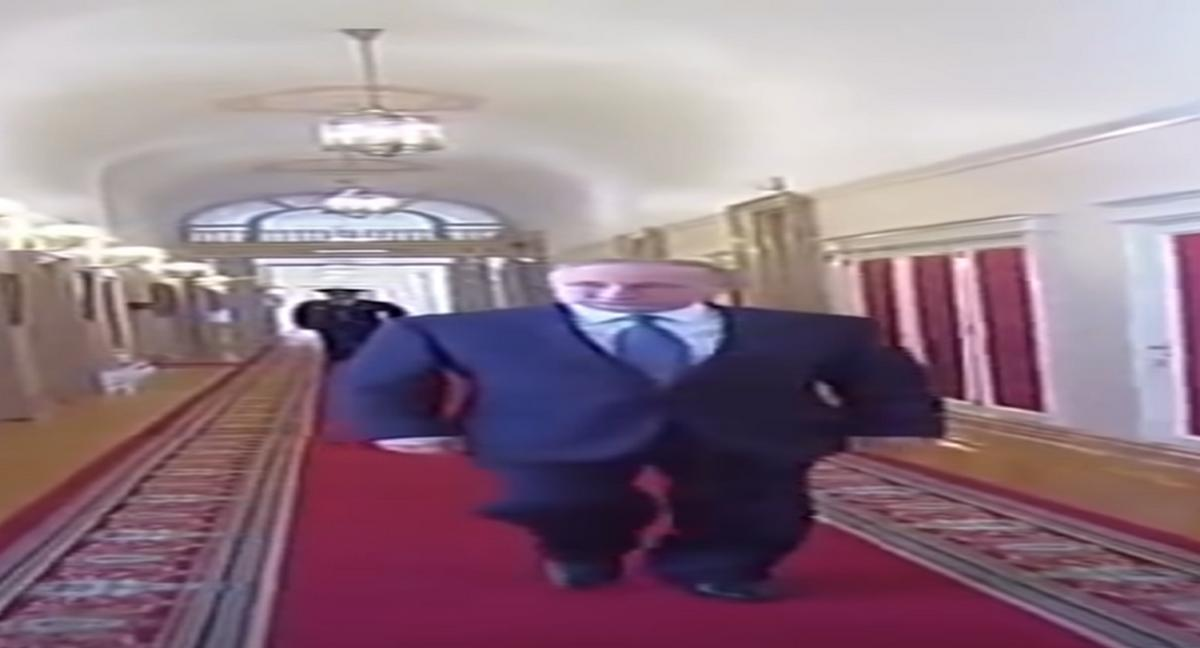

## Simple Landsat 8-9 L1 (LOTL1)

This code switches us on Simple Landsat 8-9 L1 (LOTL1)

In [ ]:
config=make_config("NO CODE")
config.save

DATACOLL = DataCollection.LANDSAT_OT_L1 # ТУТ МЕНЯЕМ СПУТНИКИ

In [ ]:
current_path='/content/LANDSAT_OT_L1'
save_task_LANDSAT_OT_L1 = SaveTask(path=current_path, overwrite_permission=OverwritePermission.OVERWRITE_FEATURES)

### NDVI With clouds

In [ ]:
get_time_NDVI = """
    //VERSION=3

    function setup() {
        return {
            input: ["B04","B08","dataMask"],
            output:[{
                id: "indices",
                bands: 1,
                sampleType: SampleType.FLOAT32
            }]
        }
    }

    function evaluatePixel(sample) {
        let ndvi = index(sample.B08, sample.B04);
        return {
           indices: [ndvi]
        };
    }
"""

In [ ]:
play_Start_Sound()

In [ ]:
%%time

add_indices = SentinelHubEvalscriptTask(
    features=[(FeatureType.DATA, 'indices')],
    evalscript=get_time_NDVI,
    data_collection=DATACOLL,
    resolution=resolution,
    maxcc=maxcc,
    time_difference=datetime.timedelta(hours=12),
    config=config,
    max_threads=MAXTHREADS,
)


workflow_nodes = linearly_connect_tasks(add_indices, save_task_LANDSAT_OT_L1)
workflow = EOWorkflow(workflow_nodes)

execution_args = [{workflow_nodes[0]: {'bbox': coords_bbox, 'time_interval': time_intervals}}]
executor = EOExecutor(workflow, execution_args, save_logs=False) #Подрубайте save_logs если будут ошибки
executor.run(multiprocess=True)

executor.make_report()

  0%|          | 0/1 [00:00<?, ?it/s]

CPU times: user 3.77 s, sys: 337 ms, total: 4.1 s
Wall time: 19.7 s


In [ ]:
#Convert json to csv
path = current_path+"/timestamp.json"
df_with_clouds = pd.read_json(path)
df_with_clouds.to_csv(current_path+"/timestamp.csv")

In [ ]:
# В данном случае мы уже применяем формулу, вместо получения обычного значения

ndvi_script = "return [(B05 - B04) / (B05 + B04)]"

request_layer = "TRUE-COLOR" # ПОСМОТРЕТЬ ДРУГИЕ СЛОИ

histogram_request = FisRequest(
    data_collection=DATACOLL, 
    layer=request_layer, 
    geometry_list=[coords_bbox],
    time=time_intervals,
    time_difference=datetime.timedelta(hours=12),
    resolution="100m",
    bins=20,
    maxcc=maxcc,
    histogram_type=HistogramType.EQUIDISTANT,
    custom_url_params={CustomUrlParam.EVALSCRIPT: ndvi_script},
    config=config,
)

histogram_data = histogram_request.get_data()

In [ ]:
#Тут мы видим данные ndvi за определенные time stamp-ы
histogram_data

[{'C0': [{'date': '2022-11-02',
    'basicStats': {'min': 0.03997247666120529,
     'max': 0.06396655738353729,
     'mean': 0.050399781559067575,
     'stDev': 0.0038805580908446},
    'histogram': {'bins': [{'lowEdge': 0.03997247666120529, 'count': 2.0},
      {'lowEdge': 0.04117218069732189, 'count': 1.0},
      {'lowEdge': 0.04237188473343849, 'count': 6.0},
      {'lowEdge': 0.043571588769555095, 'count': 15.0},
      {'lowEdge': 0.04477129280567169, 'count': 12.0},
      {'lowEdge': 0.04597099684178829, 'count': 33.0},
      {'lowEdge': 0.04717070087790489, 'count': 48.0},
      {'lowEdge': 0.04837040491402149, 'count': 48.0},
      {'lowEdge': 0.049570108950138095, 'count': 52.0},
      {'lowEdge': 0.05076981298625469, 'count': 41.0},
      {'lowEdge': 0.05196951702237129, 'count': 24.0},
      {'lowEdge': 0.05316922105848789, 'count': 26.0},
      {'lowEdge': 0.05436892509460449, 'count': 24.0},
      {'lowEdge': 0.055568629130721095, 'count': 12.0},
      {'lowEdge': 0.0567683

In [ ]:
plot_data = []
for idx, fis_response in enumerate(histogram_data):
    bins = fis_response["C0"][0]["histogram"]["bins"]

    counts = [value["count"] for value in bins]
    total_counts = sum(counts)
    counts = [round(100 * count / total_counts) for count in counts]

    bin_size = bins[1]["lowEdge"] - bins[0]["lowEdge"]
    splits = [value["lowEdge"] + bin_size / 2 for value in bins]

    print(fis_response["C0"][0]["basicStats"]["mean"])
    data = []
    for count, split in zip(counts, splits):
        data.extend([split] * count)
    plot_data.append(np.array(data))

0.050399781559067575


In [ ]:
# Тут, чтобы в лишний раз не биться, мы вставим наши значения ndvi (средние) в даты

ndvi = []
for i in range(len(fis_response["C0"])):
  print (fis_response["C0"][-i-1]["basicStats"]["mean"])
  ndvi.append(fis_response["C0"][-i-1]["basicStats"]["mean"])
ndvi = [0 if x=="NaN" else x for x in ndvi]

0.049787043254701006
0.05449199864802798
0.06486628591285454
0.0652958043729481
0.06945797499350234
0.06746801696515267
0.0684161355880939
0.06755574485894461
0.06537288473919033
0.06716977556883966
0.06650377397992371
0.0689278489748097
0.07077160549512054
0.0744144104562862
0.07083480116789753
0.07279804043228863
0.057354534191646336
0.07380799167668045
0.07111604474282454
0.06077729624983316
0.025227376816632303
0.07833424909040326
0.0635785399328755
0.07997186322008146
0.07550068701738898
0.07831386999105627
0.08066967384808733
0.07813201692846167
0.0760783447944762
0.07927779596217953
0.07926420173000386
0.07844318959700022
0.08090040741650308
0.07422076407949685
0.08207529732633538
0.08331880102986872
0.08126084573323956
0.08204719616586101
0.07995745310883809
0.07630461510068368
0.0754238917370854
0.043192551294139216
0.07981433582735127
0.08117754157106191
0.06695824009163874
0.08264199775927096
0.07964688741966426
0.08025636839801852
0.08162862190004924
0.08045477891826763
0.0

In [ ]:
#Convert json to csv

path = current_path+"/timestamp.json"
df_with_clouds = pd.read_json(path)
df_with_clouds["ndvi"] = ndvi

df_with_clouds=df_with_clouds.rename(columns={0: "year"})
df_with_clouds.to_csv(current_path+f"/timestamps_WITH_NDVI_{iter}.csv")
df_with_clouds

,year,ndvi
0,2013-04-15T06:34:02.368000,0.049787
1,2013-05-01T06:34:00.307000,0.054492
2,2013-05-17T06:34:12.680000,0.064866
3,2013-06-18T06:34:09.819000,0.065296
4,2013-07-04T06:34:12.042000,0.069458
...,...,...
221,2022-10-01T06:32:51.152000,0.078883
222,2022-10-09T06:32:35.901000,0.076462
223,2022-10-17T06:32:45.404000,0.078055
224,2022-10-25T06:32:40.427000,0.079964


In [ ]:
sns.relplot(data=df_with_clouds, x="year", y="ndvi",kind="line", height=12, aspect=.7)

In [ ]:
df_with_clouds.plot(x='year', y='ndvi', kind='hist')
plt.xlabel("year")
plt.ylabel('ndvi')
plt.title('Distribution Histogram')
plt.show()

In [ ]:
# Тут мы чет следовали доке и получили что-то

plot_data = []
for idx, fis_response in enumerate(histogram_data):
    bins = fis_response["C0"][0]["histogram"]["bins"]

    counts = [value["count"] for value in bins]
    total_counts = sum(counts)
    counts = [round(100 * count / total_counts) for count in counts]

    bin_size = bins[1]["lowEdge"] - bins[0]["lowEdge"]
    splits = [value["lowEdge"] + bin_size / 2 for value in bins]

    data = []
    for count, split in zip(counts, splits):
        data.extend([split] * count)
    plot_data.append(np.array(data))


fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.violinplot(data=plot_data, ax=ax)
ax.set(xticklabels=["Area {}".format(idx) for idx in range(len(histogram_data))])
plt.ylabel("NDVI", fontsize=15);

### NDVI Without clouds

In [ ]:
# В данном случае мы уже применяем формулу, вместо получения обычного значения

ndvi_script = "return [(B05 - B04) / (B05 + B04)]"

histogram_request = FisRequest(
    data_collection=DATACOLL, # ТУТ МЕНЯЕМ СПУТНИКИ
    layer=request_layer, # ПОСМОТРЕТЬ ДРУГИЕ СЛОИ
    geometry_list=[coords_bbox],
    time=time_intervals,
    time_difference=datetime.timedelta(hours=12),
    resolution="100m",
    bins=20,
    maxcc=maxcc,
    histogram_type=HistogramType.EQUIDISTANT,
    custom_url_params={CustomUrlParam.EVALSCRIPT: ndvi_script},
    config=config,
)

histogram_data = histogram_request.get_data()

In [ ]:
histogram_data

[{'C0': [{'date': '2022-11-02',
    'basicStats': {'min': 0.03997247666120529,
     'max': 0.06396655738353729,
     'mean': 0.050399781559067575,
     'stDev': 0.0038805580908446},
    'histogram': {'bins': [{'lowEdge': 0.03997247666120529, 'count': 2.0},
      {'lowEdge': 0.04117218069732189, 'count': 1.0},
      {'lowEdge': 0.04237188473343849, 'count': 6.0},
      {'lowEdge': 0.043571588769555095, 'count': 15.0},
      {'lowEdge': 0.04477129280567169, 'count': 12.0},
      {'lowEdge': 0.04597099684178829, 'count': 33.0},
      {'lowEdge': 0.04717070087790489, 'count': 48.0},
      {'lowEdge': 0.04837040491402149, 'count': 48.0},
      {'lowEdge': 0.049570108950138095, 'count': 52.0},
      {'lowEdge': 0.05076981298625469, 'count': 41.0},
      {'lowEdge': 0.05196951702237129, 'count': 24.0},
      {'lowEdge': 0.05316922105848789, 'count': 26.0},
      {'lowEdge': 0.05436892509460449, 'count': 24.0},
      {'lowEdge': 0.055568629130721095, 'count': 12.0},
      {'lowEdge': 0.0567683

In [ ]:
plot_data = []
for idx, fis_response in enumerate(histogram_data):
  pass
    # bins = fis_response["C0"][0]["histogram"]["bins"]

    # counts = [value["count"] for value in bins]
    # total_counts = sum(counts)
    # counts = [round(100 * count / total_counts) for count in counts]

    # bin_size = bins[1]["lowEdge"] - bins[0]["lowEdge"]
    # splits = [value["lowEdge"] + bin_size / 2 for value in bins]

    # print(fis_response["C0"][0]["basicStats"]["mean"])
    # data = []
    # for count, split in zip(counts, splits):
    #     data.extend([split] * count)
    # plot_data.append(np.array(data))

In [ ]:
ndvi = []
for i in range(len(fis_response["C0"])):
  print (fis_response["C0"][-i-1]["basicStats"]["mean"])
  ndvi.append(fis_response["C0"][-i-1]["basicStats"]["mean"])

ndvi = [0 if x=="NaN" else x for x in ndvi]

0.049787043254701006
0.05449199864802798
0.06486628591285454
0.0652958043729481
0.06945797499350234
0.06746801696515267
0.0684161355880939
0.06755574485894461
0.06537288473919033
0.06716977556883966
0.06650377397992371
0.0689278489748097
0.07077160549512054
0.0744144104562862
0.07083480116789753
0.07279804043228863
0.057354534191646336
0.07380799167668045
0.07111604474282454
0.06077729624983316
0.025227376816632303
0.07833424909040326
0.0635785399328755
0.07997186322008146
0.07550068701738898
0.07831386999105627
0.08066967384808733
0.07813201692846167
0.0760783447944762
0.07927779596217953
0.07926420173000386
0.07844318959700022
0.08090040741650308
0.07422076407949685
0.08207529732633538
0.08331880102986872
0.08126084573323956
0.08204719616586101
0.07995745310883809
0.07630461510068368
0.0754238917370854
0.043192551294139216
0.07981433582735127
0.08117754157106191
0.06695824009163874
0.08264199775927096
0.07964688741966426
0.08025636839801852
0.08162862190004924
0.08045477891826763
0.0

In [ ]:
#Convert json to csv
path = current_path+"/timestamp.json"
df_without_clouds = pd.read_json(path)
df_without_clouds["ndvi"] = ndvi

df_without_clouds=df_without_clouds.rename(columns={0: "year"})
df_without_clouds.to_csv(current_path+f"/timestamps_No_Clouds_WITH_NDVI.csv")


### Графики и иная визуализация

In [ ]:
df_merged = pd.merge(df_with_clouds,df_without_clouds,on="year")
df_merged['diff']=df_merged['ndvi_x']-df_merged['ndvi_y']
df_merged

,year,ndvi_x,ndvi_y,diff
0,2013-04-15T06:34:02.368000,0.049787,0.049787,0.0
1,2013-05-01T06:34:00.307000,0.054492,0.054492,0.0
2,2013-05-17T06:34:12.680000,0.064866,0.064866,0.0
3,2013-06-18T06:34:09.819000,0.065296,0.065296,0.0
4,2013-07-04T06:34:12.042000,0.069458,0.069458,0.0
...,...,...,...,...
221,2022-10-01T06:32:51.152000,0.078883,0.078883,0.0
222,2022-10-09T06:32:35.901000,0.076462,0.076462,0.0
223,2022-10-17T06:32:45.404000,0.078055,0.078055,0.0
224,2022-10-25T06:32:40.427000,0.079964,0.079964,0.0


In [ ]:
sns.relplot(data=df_merged[df_merged['ndvi_y']!=0],x="year", y="diff",kind="line", height=12, aspect=.7)

## Landsat 4-5 TM Level-1

This code switches us on Landsat 4-5 TM Level-1

In [ ]:
config=make_config("NO CODE")
config.save

DATACOLL = DataCollection.LANDSAT_TM_L1 # ТУТ МЕНЯЕМ СПУТНИКИ

In [ ]:
current_path='/content/Landsat_4-5_TM_Level-1'
save_task_Landsat_4_5_TM_Level_1 = SaveTask(path=current_path, overwrite_permission=OverwritePermission.OVERWRITE_FEATURES)

### NDVI With clouds

In [ ]:
get_time_NDVI = """
    //VERSION=3

    function setup() {
        return {
            input: ["B04","dataMask"],
            output:[{
                id: "indices",
                bands: 1,
                sampleType: SampleType.FLOAT32
            }]
        }
    }

    function evaluatePixel(sample) {
        let ndvi = index(sample.B04);
        return {
           indices: [ndvi]
        };
    }
"""

In [ ]:
play_Start_Sound()

In [ ]:
%%time

add_indices = SentinelHubEvalscriptTask(
    features=[(FeatureType.DATA, 'indices')],
    evalscript=get_time_NDVI,
    data_collection=DATACOLL,
    resolution=resolution,
    maxcc=maxcc,
    time_difference=datetime.timedelta(hours=12),
    config=config,
    max_threads=MAXTHREADS,
)


workflow_nodes = linearly_connect_tasks(add_indices, save_task_Landsat_4_5_TM_Level_1)
workflow = EOWorkflow(workflow_nodes)

execution_args = [{workflow_nodes[0]: {'bbox': coords_bbox, 'time_interval': time_intervals}}]
executor = EOExecutor(workflow, execution_args, save_logs=False) #Подрубайте save_logs если будут ошибки
executor.run(multiprocess=True)

executor.make_report()

  0%|          | 0/1 [00:00<?, ?it/s]

CPU times: user 5.61 s, sys: 398 ms, total: 6.01 s
Wall time: 23.8 s


In [ ]:
#Convert json to csv
path = current_path+"/timestamp.json"
df_with_clouds = pd.read_json(path)
df_with_clouds.to_csv(current_path+"/timestamp.csv")

In [ ]:
# В данном случае мы уже применяем формулу, вместо получения обычного значения

ndvi_script = "return [(B05 - B04) / (B05 + B04)]"

request_layer = "TRUE-COLOR" # ПОСМОТРЕТЬ ДРУГИЕ СЛОИ

histogram_request = FisRequest(
    data_collection=DATACOLL, 
    layer=request_layer, 
    geometry_list=[coords_bbox],
    time=time_intervals,
    time_difference=datetime.timedelta(hours=12),
    resolution="100m",
    bins=20,
    maxcc=maxcc,
    histogram_type=HistogramType.EQUIDISTANT,
    custom_url_params={CustomUrlParam.EVALSCRIPT: ndvi_script},
    config=config,
)

histogram_data = histogram_request.get_data()

In [ ]:
plot_data = []
for idx, fis_response in enumerate(histogram_data):
    bins = fis_response["C0"][0]["histogram"]["bins"]

    counts = [value["count"] for value in bins]
    total_counts = sum(counts)
    counts = [round(100 * count / total_counts) for count in counts]

    bin_size = bins[1]["lowEdge"] - bins[0]["lowEdge"]
    splits = [value["lowEdge"] + bin_size / 2 for value in bins]

    print(fis_response["C0"][0]["basicStats"]["mean"])
    data = []
    for count, split in zip(counts, splits):
        data.extend([split] * count)
    plot_data.append(np.array(data))

0.038328413045430526


In [ ]:
# Тут, чтобы в лишний раз не биться, мы вставим наши значения ndvi (средние) в даты

ndvi = []
dates=[]
for i in range(len(fis_response["C0"])):
  print (fis_response["C0"][-i-1]["basicStats"]["mean"])
  dates.append(fis_response["C0"][-i-1]['date'])
  ndvi.append(fis_response["C0"][-i-1]["basicStats"]["mean"])

ndvi = [0 if x=="NaN" else x for x in ndvi]

0.0552373747569104
0.002569033020533782
0.042261709329582314
0.050679864860443465
0.04398879029727344
-0.13987326194815652
0.030094261350788416
0.044010734689199194
0.03957177799479134
0.041675790023240865
0.024729509883360642
0.04235230740750525
0.04743079821903092
0.05133136022714497
0.05108432774938157
0.03948253737326012
0.046861988163310185
0.040753942125340226
0.003387700432263637
0.04842881232996106
0.04411565683498655
0.046505108531361986
0.049177540516804716
0.04116173312270448
0.0339186227698203
0.04110197029228358
0.04607128483526733
0.007812073851275042
0.04809378347430458
0.041246983948993766
0.0420154430992071
0.04800228888432133
0.041338036307538656
0.0401554227421951
0.03777631792163642
0.04683591804021722
0.050686357492257035
0.03822678950129316
0.037732611919004184
0.03808176352227439
0.027655357357972477
0.04557116645256704
0.04047304815258427
0.03473293370789969
0.0490214590985409
0.05790967803003022
0.03348325185082934
0.03600660950431358
0.04851307399550694
-0.006

In [ ]:
#Convert json to csv

df_with_clouds = pd.DataFrame({'year': dates, 'ndvi': ndvi})
df_with_clouds.to_csv(current_path+f"/timestamps_WITH_NDVI_{iter}.csv")
df_with_clouds

,year,ndvi
0,1984-06-18,0.055237
1,1984-11-25,0.002569
2,1985-01-12,0.042262
3,1985-01-28,0.050680
4,1986-01-15,0.043989
...,...,...
335,2010-12-03,0.064065
336,2011-01-04,0.059652
337,2011-01-20,0.060557
338,2011-03-25,0.050964


In [ ]:
sns.relplot(data=df_with_clouds, x="year", y="ndvi",kind="line", height=12, aspect=.7)

In [ ]:
df_with_clouds.plot(x='year', y='ndvi', kind='hist')
plt.xlabel("year")
plt.ylabel('ndvi')
plt.title('Distribution Histogram')
plt.show()

In [ ]:
# Тут мы чет следовали доке и получили что-то

plot_data = []
for idx, fis_response in enumerate(histogram_data):
    bins = fis_response["C0"][0]["histogram"]["bins"]

    counts = [value["count"] for value in bins]
    total_counts = sum(counts)
    counts = [round(100 * count / total_counts) for count in counts]

    bin_size = bins[1]["lowEdge"] - bins[0]["lowEdge"]
    splits = [value["lowEdge"] + bin_size / 2 for value in bins]

    data = []
    for count, split in zip(counts, splits):
        data.extend([split] * count)
    plot_data.append(np.array(data))


fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.violinplot(data=plot_data, ax=ax)
ax.set(xticklabels=["Area {}".format(idx) for idx in range(len(histogram_data))])
plt.ylabel("NDVI", fontsize=15);

### NDVI Without clouds

In [ ]:
# В данном случае мы уже применяем формулу, вместо получения обычного значения

ndvi_script = "return [(B05 - B04) / (B05 + B04)]"

histogram_request = FisRequest(
    data_collection=DATACOLL, # ТУТ МЕНЯЕМ СПУТНИКИ
    layer=request_layer, # ПОСМОТРЕТЬ ДРУГИЕ СЛОИ
    geometry_list=[coords_bbox],
    time=time_intervals,
    time_difference=datetime.timedelta(hours=12),
    resolution="100m",
    bins=20,
    maxcc=maxcc,
    histogram_type=HistogramType.EQUIDISTANT,
    custom_url_params={CustomUrlParam.EVALSCRIPT: ndvi_script},
    config=config,
)

histogram_data = histogram_request.get_data()

In [ ]:
histogram_data

[{'C0': [{'date': '2011-11-04',
    'basicStats': {'min': -0.006567898206412792,
     'max': 0.06665633618831635,
     'mean': 0.038328413045430526,
     'stDev': 0.014152954585355777},
    'histogram': {'bins': [{'lowEdge': -0.006567898206412792, 'count': 5.0},
      {'lowEdge': -0.0029066864866763354, 'count': 1.0},
      {'lowEdge': 0.0007545252330601214, 'count': 3.0},
      {'lowEdge': 0.004415736952796578, 'count': 6.0},
      {'lowEdge': 0.008076948672533035, 'count': 2.0},
      {'lowEdge': 0.011738160392269492, 'count': 8.0},
      {'lowEdge': 0.015399372112005948, 'count': 15.0},
      {'lowEdge': 0.019060583831742407, 'count': 10.0},
      {'lowEdge': 0.022721795551478862, 'count': 14.0},
      {'lowEdge': 0.02638300727121532, 'count': 19.0},
      {'lowEdge': 0.030044218990951777, 'count': 24.0},
      {'lowEdge': 0.03370543071068823, 'count': 38.0},
      {'lowEdge': 0.03736664243042469, 'count': 54.0},
      {'lowEdge': 0.04102785415016114, 'count': 50.0},
      {'lowEdge

In [ ]:
# Тут, чтобы в лишний раз не биться, мы вставим наши значения ndvi (средние) в даты

ndvi = []
dates=[]
for i in range(len(fis_response["C0"])):
  print (fis_response["C0"][-i-1]["basicStats"]["mean"])
  dates.append(fis_response["C0"][-i-1]['date'])
  ndvi.append(fis_response["C0"][-i-1]["basicStats"]["mean"])

ndvi = [0 if x=="NaN" else x for x in ndvi]

0.0552373747569104
0.002569033020533782
0.042261709329582314
0.050679864860443465
0.04398879029727344
-0.13987326194815652
0.030094261350788416
0.044010734689199194
0.03957177799479134
0.041675790023240865
0.024729509883360642
0.04235230740750525
0.04743079821903092
0.05133136022714497
0.05108432774938157
0.03948253737326012
0.046861988163310185
0.040753942125340226
0.003387700432263637
0.04842881232996106
0.04411565683498655
0.046505108531361986
0.049177540516804716
0.04116173312270448
0.0339186227698203
0.04110197029228358
0.04607128483526733
0.007812073851275042
0.04809378347430458
0.041246983948993766
0.0420154430992071
0.04800228888432133
0.041338036307538656
0.0401554227421951
0.03777631792163642
0.04683591804021722
0.050686357492257035
0.03822678950129316
0.037732611919004184
0.03808176352227439
0.027655357357972477
0.04557116645256704
0.04047304815258427
0.03473293370789969
0.0490214590985409
0.05790967803003022
0.03348325185082934
0.03600660950431358
0.04851307399550694
-0.006

In [ ]:
#Convert json to csv

df_without_clouds = pd.DataFrame({'year': dates, 'ndvi': ndvi})
df_without_clouds.to_csv(current_path+"/timestamps_No_Clouds_WITH_NDVI.csv")
df_without_clouds



,year,ndvi
0,1984-06-18,0.055237
1,1984-11-25,0.002569
2,1985-01-12,0.042262
3,1985-01-28,0.050680
4,1986-01-15,0.043989
...,...,...
335,2010-12-03,0.064065
336,2011-01-04,0.059652
337,2011-01-20,0.060557
338,2011-03-25,0.050964


### Графики и иная визуализация

In [ ]:
df_merged = pd.merge(df_with_clouds,df_without_clouds,on="year")
df_merged['diff']=df_merged['ndvi_x']-df_merged['ndvi_y']
df_merged

,year,ndvi_x,ndvi_y,diff
0,1984-06-18,0.055237,0.055237,0.0
1,1984-11-25,0.002569,0.002569,0.0
2,1985-01-12,0.042262,0.042262,0.0
3,1985-01-28,0.050680,0.050680,0.0
4,1986-01-15,0.043989,0.043989,0.0
...,...,...,...,...
335,2010-12-03,0.064065,0.064065,0.0
336,2011-01-04,0.059652,0.059652,0.0
337,2011-01-20,0.060557,0.060557,0.0
338,2011-03-25,0.050964,0.050964,0.0


In [ ]:
sns.relplot(data=df_merged[df_merged['ndvi_y']!=0],x="year", y="diff",kind="line", height=12, aspect=.7)

# Join datasets

In [ ]:
dataset2 = pd.read_csv('/content/1/timestamps_WITH_NDVI_2.csv')
dataset2=dataset2.append(pd.read_csv('/content/2/timestamps_WITH_NDVI_2.csv'), ignore_index=True)
dataset2=dataset2.append(pd.read_csv('/content/3/timestamps_WITH_NDVI_2.csv'), ignore_index=True)
ds2=[51.66832032634,55.54965793272754, 51.710212984807804,55.656099834937024]
dataset2.insert(1, 'X1', ds2[0])
dataset2.insert(2, 'Y1', ds2[1])
dataset2.insert(3, 'X2', ds2[2])
dataset2.insert(4, 'Y2', ds2[3])
dataset2['year']=pd.to_datetime(dataset2['year']).dt.date
dataset2['year']=pd.to_datetime(dataset2['year'])

dataset3 = pd.read_csv('/content/1/timestamps_WITH_NDVI_3.csv')
dataset3=dataset3.append(pd.read_csv('/content/2/timestamps_WITH_NDVI_3.csv'), ignore_index=True)
dataset3=dataset3.append(pd.read_csv('/content/3/timestamps_WITH_NDVI_3.csv'), ignore_index=True)
ds3=[43.65897728623423,39.8019048723998, 43.68033496552715,39.82798231839563]
dataset3.insert(1, 'X1', ds3[0])
dataset3.insert(2, 'Y1', ds3[1])
dataset3.insert(3, 'X2', ds3[2])
dataset3.insert(4, 'Y2', ds3[3])
dataset3['year']=pd.to_datetime(dataset3['year']).dt.date
dataset3['year']=pd.to_datetime(dataset3['year'])

dataset4 = pd.read_csv('/content/1/timestamps_WITH_NDVI_4.csv')
dataset4=dataset4.append(pd.read_csv('/content/2/timestamps_WITH_NDVI_4.csv'), ignore_index=True)
dataset4=dataset4.append(pd.read_csv('/content/3/timestamps_WITH_NDVI_4.csv'), ignore_index=True)
ds4=[55.27270241512775,37.63253179147199, 55.28662415028995,37.65696914652468]
dataset4.insert(1, 'X1', ds4[0])
dataset4.insert(2, 'Y1', ds4[1])
dataset4.insert(3, 'X2', ds4[2])
dataset4.insert(4, 'Y2', ds4[3])
dataset4['year']=pd.to_datetime(dataset4['year']).dt.date
dataset4['year']=pd.to_datetime(dataset4['year'])

dataset5 = pd.read_csv('/content/1/timestamps_WITH_NDVI_5.csv')
dataset5=dataset5.append(pd.read_csv('/content/2/timestamps_WITH_NDVI_5.csv'), ignore_index=True)
dataset5=dataset5.append(pd.read_csv('/content/3/timestamps_WITH_NDVI_5.csv'), ignore_index=True)
ds5=[56.41102036778891,44.25694241484177, 56.42626362401187,44.29368045196794]
dataset5.insert(1, 'X1', ds5[0])
dataset5.insert(2, 'Y1', ds5[1])
dataset5.insert(3, 'X2', ds5[2])
dataset5.insert(4, 'Y2', ds5[3])
dataset5['year']=pd.to_datetime(dataset5['year']).dt.date
dataset5['year']=pd.to_datetime(dataset5['year'])

dataset6 = pd.read_csv('/content/1/timestamps_WITH_NDVI_6.csv')
dataset6=dataset6.append(pd.read_csv('/content/2/timestamps_WITH_NDVI_6.csv'), ignore_index=True)
dataset6=dataset6.append(pd.read_csv('/content/3/timestamps_WITH_NDVI_6.csv'), ignore_index=True)
ds6=[59.73277704263077,31.296347348048116, 59.74170637196017,31.33800565800369]
dataset6.insert(1, 'X1', ds6[0])
dataset6.insert(2, 'Y1', ds6[1])
dataset6.insert(3, 'X2', ds6[2])
dataset6.insert(4, 'Y2', ds6[3])
dataset6['year']=pd.to_datetime(dataset6['year']).dt.date
dataset6['year']=pd.to_datetime(dataset6['year'])

In [ ]:
df=dataset2.append(dataset3, ignore_index=True)
df=df.append(dataset4, ignore_index=True)
df=df.append(dataset5, ignore_index=True)
df=df.append(dataset6, ignore_index=True)
df

,Unnamed: 0,X1,Y1,X2,Y2,year,ndvi
0,0,51.668320,55.549658,51.710213,55.656100,2013-03-28,0.020467
1,1,51.668320,55.549658,51.710213,55.656100,2013-04-19,0.122423
2,2,51.668320,55.549658,51.710213,55.656100,2013-05-14,0.240449
3,3,51.668320,55.549658,51.710213,55.656100,2013-05-21,0.101984
4,4,51.668320,55.549658,51.710213,55.656100,2013-05-30,0.410214
...,...,...,...,...,...,...,...
4633,351,59.732777,31.296347,59.741706,31.338006,2022-10-12,0.040423
4634,352,59.732777,31.296347,59.741706,31.338006,2022-10-17,0.038737
4635,353,59.732777,31.296347,59.741706,31.338006,2022-10-22,0.040345
4636,354,59.732777,31.296347,59.741706,31.338006,2022-10-27,0.042363


In [ ]:
df=df.sort_values(by="year") 
df['ndvi']=pd.to_numeric(df['ndvi'])
df=df.reset_index(drop=True)

In [ ]:
df

,Unnamed: 0,X1,Y1,X2,Y2,year,ndvi
0,0,51.668320,55.549658,51.710213,55.656100,1984-04-12,-0.199682
1,0,56.411020,44.256942,56.426264,44.293680,1984-05-04,0.053043
2,1,51.668320,55.549658,51.710213,55.656100,1984-05-05,0.062693
3,2,51.668320,55.549658,51.710213,55.656100,1984-05-30,-0.161775
4,0,43.658977,39.801905,43.680335,39.827982,1984-06-06,-0.145720
...,...,...,...,...,...,...,...
4633,355,59.732777,31.296347,59.741706,31.338006,2022-11-01,0.047494
4634,337,51.668320,55.549658,51.710213,55.656100,2022-11-02,0.031750
4635,587,43.658977,39.801905,43.680335,39.827982,2022-11-02,0.095265
4636,545,55.272702,37.632532,55.286624,37.656969,2022-11-02,0.095418


In [ ]:
df.to_csv("res.csv")

In [ ]:
df.insert(7, 'temp_avg', None)

In [ ]:
df

,Unnamed: 0,X1,Y1,X2,Y2,year,ndvi,temp_avg
0,0,51.668320,55.549658,51.710213,55.656100,1984-04-12,-0.199682,None
1,0,56.411020,44.256942,56.426264,44.293680,1984-05-04,0.053043,None
2,1,51.668320,55.549658,51.710213,55.656100,1984-05-05,0.062693,None
3,2,51.668320,55.549658,51.710213,55.656100,1984-05-30,-0.161775,None
4,0,43.658977,39.801905,43.680335,39.827982,1984-06-06,-0.145720,None
...,...,...,...,...,...,...,...,...
4633,355,59.732777,31.296347,59.741706,31.338006,2022-11-01,0.047494,None
4634,337,51.668320,55.549658,51.710213,55.656100,2022-11-02,0.031750,None
4635,587,43.658977,39.801905,43.680335,39.827982,2022-11-02,0.095265,None
4636,545,55.272702,37.632532,55.286624,37.656969,2022-11-02,0.095418,None


In [ ]:
temp = pd.read_csv('/content/orenburg_temp_avg.csv')
temp['time']=pd.to_datetime(temp['time'])
temp

,Unnamed: 0,x,y,time,temp_avg
0,0,51.683878,55.5882,2009-01-01,-14.0
1,1,51.683878,55.5882,2009-01-02,-12.2
2,2,51.683878,55.5882,2009-01-03,-15.1
3,3,51.683878,55.5882,2009-01-04,-18.3
4,4,51.683878,55.5882,2009-01-05,-13.7
...,...,...,...,...,...
4924,4924,51.683878,55.5882,2022-06-26,20.4
4925,4925,51.683878,55.5882,2022-06-27,17.7
4926,4926,51.683878,55.5882,2022-06-28,17.2
4927,4927,51.683878,55.5882,2022-06-29,13.1


In [ ]:
for index, row in df.iterrows():
  if(len(temp[(temp['time'] == row['year']) and
               (
                  (row['X1'])
            ])!=0):
    var_temp=temp[(temp['time'] == row['year'])]
    row['temp_avg'] = var_temp['temp_avg']
    df._set_value(index,'temp_avg',row['temp_avg'].item())


SyntaxError: ignored

In [ ]:
df.iloc[[3000]]

,Unnamed: 0,X1,Y1,X2,Y2,year,ndvi,temp_avg
3000,111,55.272702,37.632532,55.286624,37.656969,2019-08-02,0.187842,14.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4638 entries, 0 to 4637
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  4638 non-null   int64         
 1   X1          4638 non-null   float64       
 2   Y1          4638 non-null   float64       
 3   X2          4638 non-null   float64       
 4   Y2          4638 non-null   float64       
 5   year        4638 non-null   datetime64[ns]
 6   ndvi        4638 non-null   float64       
 7   temp_avg    3003 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 290.0+ KB


In [ ]:
df.drop(columns=df.columns[0], axis=1, inplace=True)
df.reset_index(drop=True)
df

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,X1,Y1,X2,Y2,year,ndvi,Temp
300,60.412092,67.659102,60.42143,67.67747,2009-06-11,-0.326907,None
301,60.412092,67.659102,60.42143,67.67747,2009-06-13,-0.041798,None
302,60.412092,67.659102,60.42143,67.67747,2009-06-18,-0.062759,None
303,60.412092,67.659102,60.42143,67.67747,2009-06-20,-0.012458,None
304,60.412092,67.659102,60.42143,67.67747,2009-07-13,-0.147995,None
...,...,...,...,...,...,...,...
318,60.412092,67.659102,60.42143,67.67747,2022-09-25,0.270891,None
319,60.412092,67.659102,60.42143,67.67747,2022-09-30,0.092957,None
320,60.412092,67.659102,60.42143,67.67747,2022-10-11,0.050353,None
321,60.412092,67.659102,60.42143,67.67747,2022-10-15,0.027757,None


In [ ]:
for index, row in df.iterrows():
    print(index)
    var = [60.412093,67.67747]
    if ()
    # if not filtered_data.empty:
    #     final_df = final_df.append(filtered_data, ignore_index=True)

346

In [ ]:
# проверить сначала, что точка находится между двумя другими, а потом добавить в строку погоду

In [ ]:
var = [59.312609608598564, 41.63740971748775]
tester = [60.412092, 67.659102, 60.421430, 67.677470]
if (((tester[0]<=var[0]<=tester[2]) or (tester[0]>=var[0]>=tester[2])) and ( (tester[1]<=var[1]<=tester[3]) or (tester[1]>=var[1]>=tester[3]))):
  print(1)
else:
  print(0)

0


# ML

### Loading in dataset

In [ ]:
%%time
data_chunk = pd.read_csv(f'', chunksize=10_000, nrows=50_000) #nrows = max rows to take
data_chunk

In [ ]:
%%time
#storing the chunks after iterating from chunk object

chunk_data=[chunk for chunk in data_chunk]

#concatnating dataframes to make it a complete dataset

dataset=pd.concat(chunk_data)

### Analysis of the dataset

In [ ]:
dataset.info(memory_usage="deep")


In [ ]:
dataset

In [ ]:
dataset.value_counts()

### Changin' types

In [ ]:
#EXAMPLE
#dataset["date_create"] = pd.to_datetime(dataset["date_create"])
#dataset["opened"] = dataset["opened"].astype("category")


In [ ]:
#Better to check mem usage after dat
dataset.info(memory_usage="deep")

### Deleting Columns

In [ ]:
#EXAMPLE
#dataset.drop('comments', axis=1, inplace=True)


### Dealing with Nulls

In [ ]:
dataset.isnull().sum()

In [ ]:
# EXAMPLE
df = dataset.dropna(axis=1,   #thresh shows how many values should be NaNs to delete column
                thresh=15_000).copy() #.copy() is only here to suppress a warning.
df['contact_id'] = dataset['contact_id']  # If column is deleted, but should be kept - use this
df.info()

In [ ]:
for col in df:
  print("\n")
  print(col,df[col].unique())

In [ ]:
for col in df:
  print(col,df[col].nunique())

In [ ]:
df['COLUMN HERE'].value_counts()

### PIPELINE

In [ ]:
#EXAMPLE

#Cleaning Nulls 

def preprocessing_probability(data):
  data[""]=data[""].astype(str).apply(lambda x: x.split('%')[0].split(',')[0])
  data["probability"]=data["probability"].astype(str).apply(lambda x: x.split('%')[0].split(',')[0])
  return None
  
def preprocessing_zeroing(data):
  data[""]=data[""].fillna(0)
  #data["kvpct"]=data["kvpct"].astype(str).apply(lambda x: x.split('%')[0].split(',')[0])
  return None

def run_pipe(dff):
  preprocessing = Pipeline(steps=[
    # преобразуем признаки, исходя из прошлого анализа
    ('something', FunctionTransformer(preprocessing_probability(dff)))
    ]
    )
  return preprocessing.fit_transform(dff)
df = pd.DataFrame(run_pipe(df))

In [ ]:
df.info()